# K Means

K-means es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de $n$ observaciones en $k$ grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano.

Es un método utilizado en minería de datos.

El algoritmo estándar fue propuesto por primera vez por Stuart Lloyd en 1957, aunque no se publicó fuera de los laboratorios Bell hasta 1982. En 1965, E. W. Forgy publicó esencialmente el mismo método, por lo que a veces también se le nombra como Lloyd-Forgy. UUna versión más eficiente fue propuesta y publicada en Fortran por Hartigan y Wong en 1975/1979

### Pasos

1. Elegir $k$ 
2. Crear $k$ puntos/centroides aleatoriamente.
3. Clasificar los puntos de acuerdo al centroide más cercano (métrica euclidiana)
4. Recalcular el centroide en función de los puntos clasificados en el paso anterior y volver a clasificar los puntos.
5. Si al menos un punto cambio de clasificación, ejecutar nuevamente el paso 4. En caso contrario, se termina algoritmo.

![hola](Kmeans.gif)

### Bibliotecas

In [1]:
import pandas            as pd    # Biblioteca para trabajar con DataFrames
import numpy             as np    # Biblioteca para trabajar con àlgebra lineal
import matplotlib.pyplot as plt   # Biblioteca para realizar gràficas
import warnings

from sklearn.cluster import KMeans                            # Clasificador Gausiano de Naive Bayes (datos continuos)
from sklearn.metrics import accuracy_score, confusion_matrix  # Función para calcular la precisión de clasificación

warnings.filterwarnings("ignore")

### Ejemplo :: Mall Customers

In [2]:
# Se carga el datasets de iris
datos = pd.read_csv("Mall_Customers.csv")
datos.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Generamos nuestra matriz de diseño y nuestro vector de y
matriz_diseño = datos.values[:,[3,4]]
print("Matriz de diseño:")
print( matriz_diseño[0:5,:] )

Matriz de diseño:
[[15 39]
 [15 81]
 [16 6]
 [16 77]
 [17 40]]


### Grafica de nuestros datos

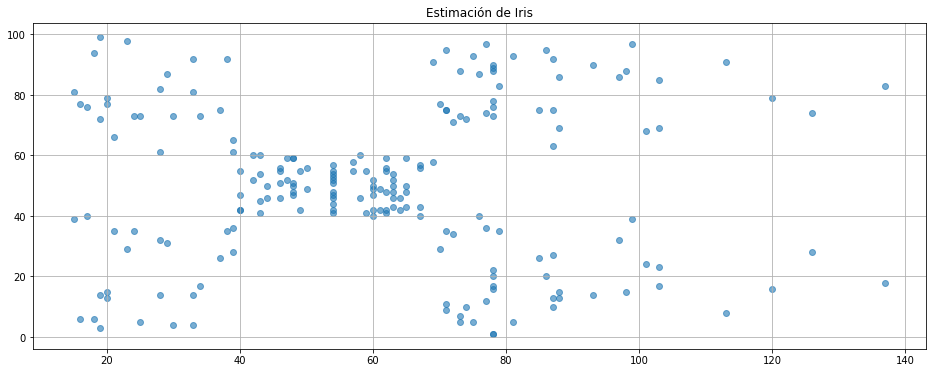

In [4]:
# Graficamos nuestros puntos
plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
plt.title("Estimación de Iris")
plt.scatter( x=matriz_diseño[:,0], y=matriz_diseño[:,1], label="Puntos", alpha = 0.6)
plt.grid()
plt.show()

### Identificación del número adecuado de grupos

Para esto, utilizaremos una métrica de qué tan cercanos están los puntos a sus respectivos centroides. 
Esta métrica se conoce como WCSS (Within Cluster Sum Squares), es decir, suma las distancias al cuadrado de los puntos a sus centroides. 

La siguiente gráfica muestra WCSS en función de $k$. La idea de esta métrica es quedarnos con la $k$ más grande, pero que ya no represente una disminución sustancial de WCSS. Para este ejemplo, $k = 5$. 

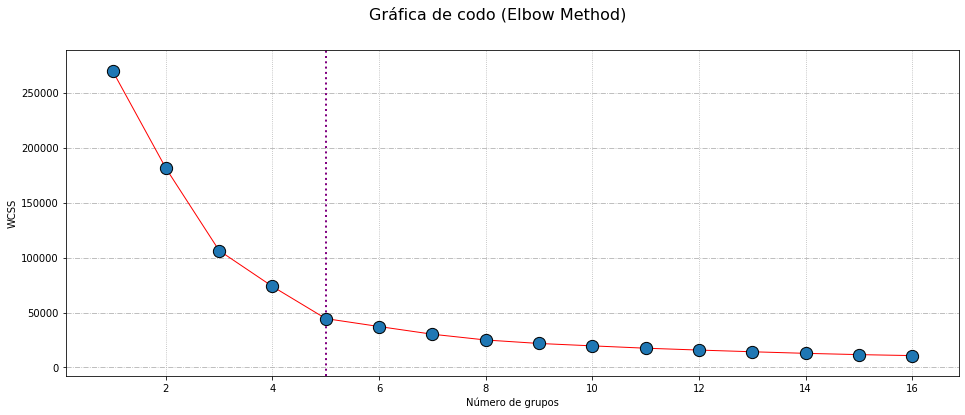

In [5]:
wcss = []
num_clusters = list(range(1, 16+1))
for k in num_clusters:
    wcss.append( KMeans(n_clusters = k, init = 'k-means++', n_init = 100, random_state = 0).fit( matriz_diseño ).inertia_ )
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6) )
fig.suptitle("Gráfica de codo (Elbow Method)", fontsize=16)
#ax.grid()
ax.set_axisbelow(True)
ax.xaxis.grid(linestyle=":")
ax.yaxis.grid(linestyle="-.")
ax.set_xlabel('Número de grupos')
ax.set_ylabel('WCSS')
ax.axvline( x = 5 , color = 'purple', linewidth = 2, linestyle = 'dotted', zorder=1 )
ax.plot( num_clusters, wcss, c="red", linewidth = 1, linestyle = '-', zorder=2 )
#ax.scatter( num_clusters, wcss, c = "green", alpha = 0.7, s = 150, edgecolor="black", zorder=3 )
ax.scatter( num_clusters, wcss, s=150,edgecolor = "black", zorder=3 )
plt.show()

Basándonos en la gráfica anterior, podemos argumentar que 5 grupos son suficientes.

El aumentar el número de grupos ya no es una representa una disminución significativa en términos de WCSS

### Modelo K Means

Nos basaremos en la información del paso anterior para generar un modelo con 5 grupos.

In [6]:
modeloKM = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, random_state = 0).fit( matriz_diseño )
modeloKM

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Podemos revisar los centroides de los grupos con el siguiente comando

In [7]:
modeloKM.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

Graficamos los puntos con su respectivo grupo

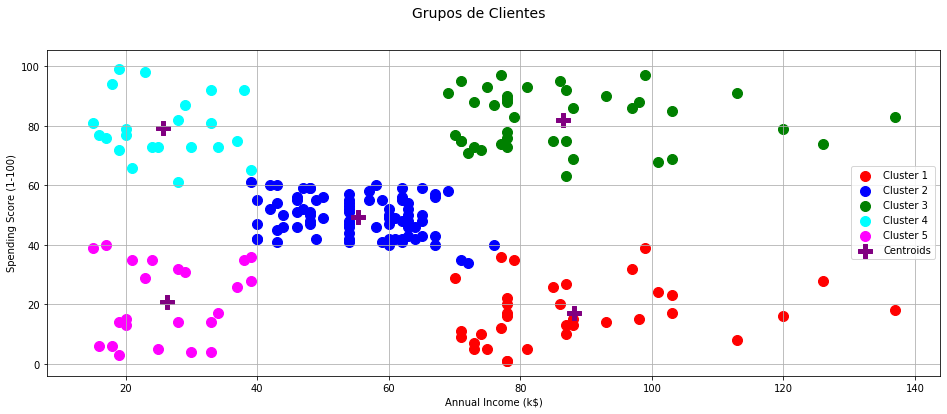

In [8]:
# Estimamos el grupo al que pertenecen los puntos
y_kmeans = modeloKM.predict( matriz_diseño )
y_kmeans

# Graficamos los puntos de acuerdo al grupo
plt.subplots(nrows=1, ncols=1, figsize=(16,6) )
plt.suptitle('Grupos de Clientes', fontsize=14)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.scatter(matriz_diseño[y_kmeans == 0, 0], matriz_diseño[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(matriz_diseño[y_kmeans == 1, 0], matriz_diseño[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(matriz_diseño[y_kmeans == 2, 0], matriz_diseño[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(matriz_diseño[y_kmeans == 3, 0], matriz_diseño[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(matriz_diseño[y_kmeans == 4, 0], matriz_diseño[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(modeloKM.cluster_centers_[:, 0], modeloKM.cluster_centers_[:, 1], s = 200, c = 'purple', marker = 'P', label = 'Centroids')
plt.legend()
plt.show()

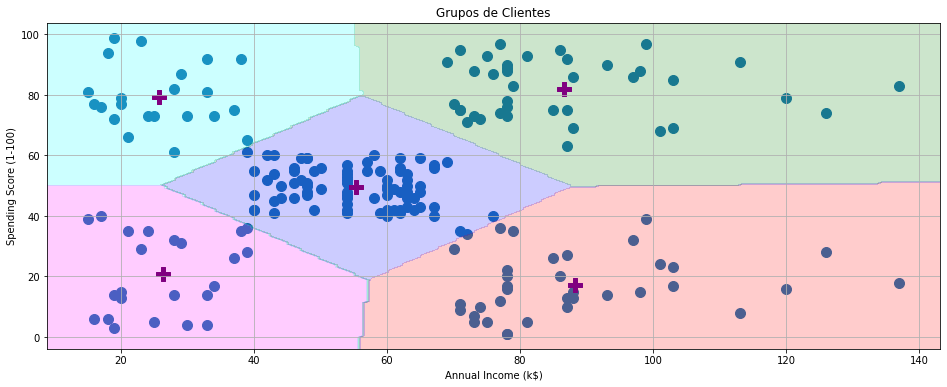

In [9]:
# Graficamos nuestros puntos
plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
plt.title('Grupos de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
# Graficamos los puntos 
plt.scatter( x=matriz_diseño[:,0], y=matriz_diseño[:,1], label="Puntos", alpha = 1, s = 100)
# Obtenemos los limites de la grafica actual para poder calcular Z
XX1, XX2  = np.meshgrid( np.linspace(plt.gca().get_xlim()[0], plt.gca().get_xlim()[1], 200 ),
                         np.linspace(plt.gca().get_ylim()[0], plt.gca().get_ylim()[1], 200 ) )
YY        = modeloKM.predict( np.vstack( [XX1.ravel(), XX2.ravel()] ).T ).reshape( XX1.shape ) 
# Graficamos el fondo para identificar el grupo
plt.contourf(XX1, XX2, YY, alpha=0.20, levels = 5, colors =['red','blue','green','cyan','magenta'] )
plt.scatter(modeloKM.cluster_centers_[:, 0], modeloKM.cluster_centers_[:, 1], s = 200, c = 'purple', marker = 'P', label = 'Centroids')
plt.show()
